In [1]:
import pandas as pd

In [2]:
dm=pd.read_csv('bigdatamart_Train.csv')

In [3]:
dm

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
dm.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
dm.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
dm.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
from sklearn.impute import SimpleImputer

In [12]:
imp=SimpleImputer(strategy='mean')
dm['Item_Weight']=imp.fit_transform(dm['Item_Weight'].values.reshape(-1,1))

In [17]:
imp1=SimpleImputer(strategy='most_frequent')
dm['Outlet_Size']=imp1.fit_transform(dm['Outlet_Size'].values.reshape(-1,1))

In [19]:
dm.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
dm.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for prisha in list:
    dm[prisha]=le.fit_transform(dm[prisha].astype(str))

In [28]:
dm.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

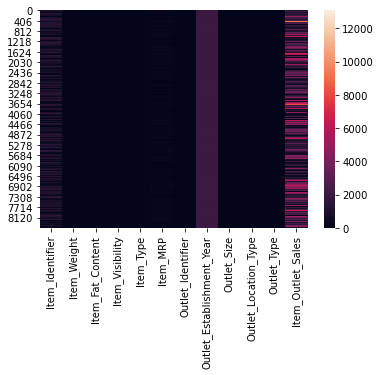

In [32]:
sns.heatmap(data=dm)

In [34]:
dm_c=dm.corr()
dm_c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.008153,-0.059378,-0.024490,0.200935,-0.008104,0.010950,-0.002310,0.004656,-0.014206,-0.009276,0.001809
Item_Weight,0.008153,1.000000,-0.017331,-0.012049,0.050430,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.059378,-0.017331,1.000000,0.034042,-0.169001,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.024490,-0.012049,0.034042,1.000000,-0.024445,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.200935,0.050430,-0.169001,-0.024445,1.000000,0.045667,-0.005906,0.004312,-0.014676,0.008140,0.000485,0.023386
Item_MRP,-0.008104,0.024756,-0.000876,-0.001315,0.045667,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,0.010950,-0.007975,-0.002357,-0.100439,-0.005906,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.002310,-0.008301,-0.000189,-0.074834,0.004312,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.004656,-0.007225,-0.012058,0.069309,-0.014676,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,-0.014206,0.004088,-0.004102,-0.028099,0.008140,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


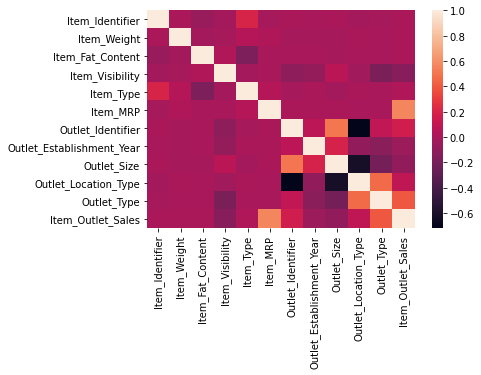

In [35]:
sns.heatmap(data=dm_c)

In [36]:
dm.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,778.75220,12.857645,1.369354,0.066132,8.567758,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.31735,4.226124,0.644810,0.051598,4.643519,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.00000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,393.50000,9.310000,1.000000,0.026989,5.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,775.00000,12.857645,1.000000,0.053931,10.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.00000,16.000000,2.000000,0.094585,12.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.00000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [37]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [38]:
dm.skew()

Item_Identifier              0.009444
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                   -0.382475
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Item_Identifier                 AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Item_Weight                  AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Item_Fat_Content             AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Item_Visibility              AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Item_Type                    AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Item_MRP                     AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Outlet_Identifier            AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Outlet_Size                        AxesSubplot(0.125,0.125;0.0824468x0.343182)
Outlet_Location_Type            AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Outlet_Type                     AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Item_Outlet_Sales               AxesSubplot(0.421809,0.125;0.0824468x0.343182)
dtype: object

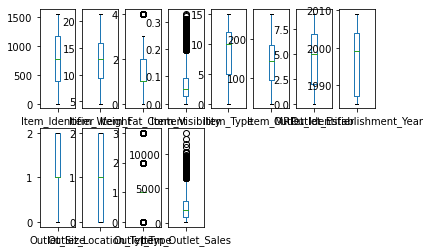

In [49]:
dm.plot(kind='box',subplots=True,layout=(2,8))

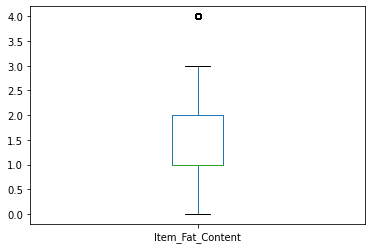

In [50]:
dm['Item_Fat_Content'].plot.box()

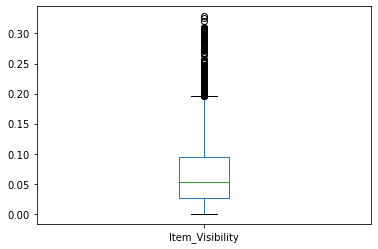

In [51]:
dm['Item_Visibility'].plot.box()

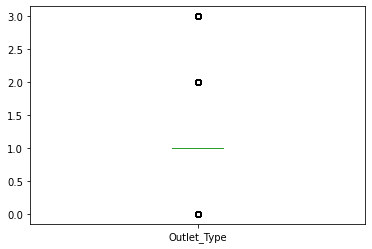

In [52]:
dm['Outlet_Type'].plot.box()

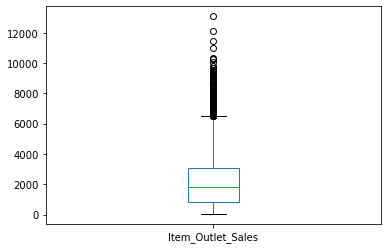

In [53]:
dm['Item_Outlet_Sales'].plot.box()

In [55]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dm))
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [56]:
dm_new=dm[(z<3).all(axis=1)]

In [57]:
dm_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1142,9.300,1,0.016047,10,249.8092,9,1999,1,0,1,3735.1380
1,377,5.920,2,0.019278,6,48.2692,3,2009,1,2,2,443.4228
2,208,17.500,1,0.016760,2,141.6180,9,1999,1,0,1,2097.2700
3,424,19.200,2,0.000000,12,182.0950,0,1998,1,2,0,732.3800
4,819,8.930,1,0.000000,15,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1406,6.865,1,0.056783,5,214.5218,1,1987,0,2,1,2778.3834
8519,497,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,892,10.600,1,0.035186,14,85.1224,6,2004,2,1,1,1193.1136
8521,232,7.210,2,0.145221,5,103.1332,3,2009,1,2,2,1845.5976


Item_Identifier                 AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Item_Weight                  AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Item_Fat_Content             AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Item_Visibility              AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Item_Type                    AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Item_MRP                     AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Outlet_Identifier            AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Outlet_Size                        AxesSubplot(0.125,0.125;0.0824468x0.343182)
Outlet_Location_Type            AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Outlet_Type                     AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Item_Outlet_Sales               AxesSubplot(0.421809,0.125;0.0824468x0.343182)
dtype: object

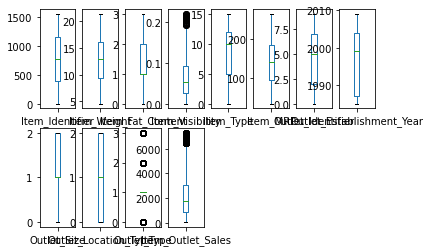

In [58]:
dm_new.plot(kind='box',subplots=True,layout=(2,8))

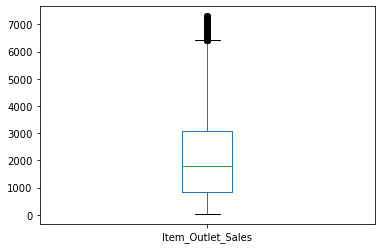

In [59]:
dm_new['Item_Outlet_Sales'].plot.box()

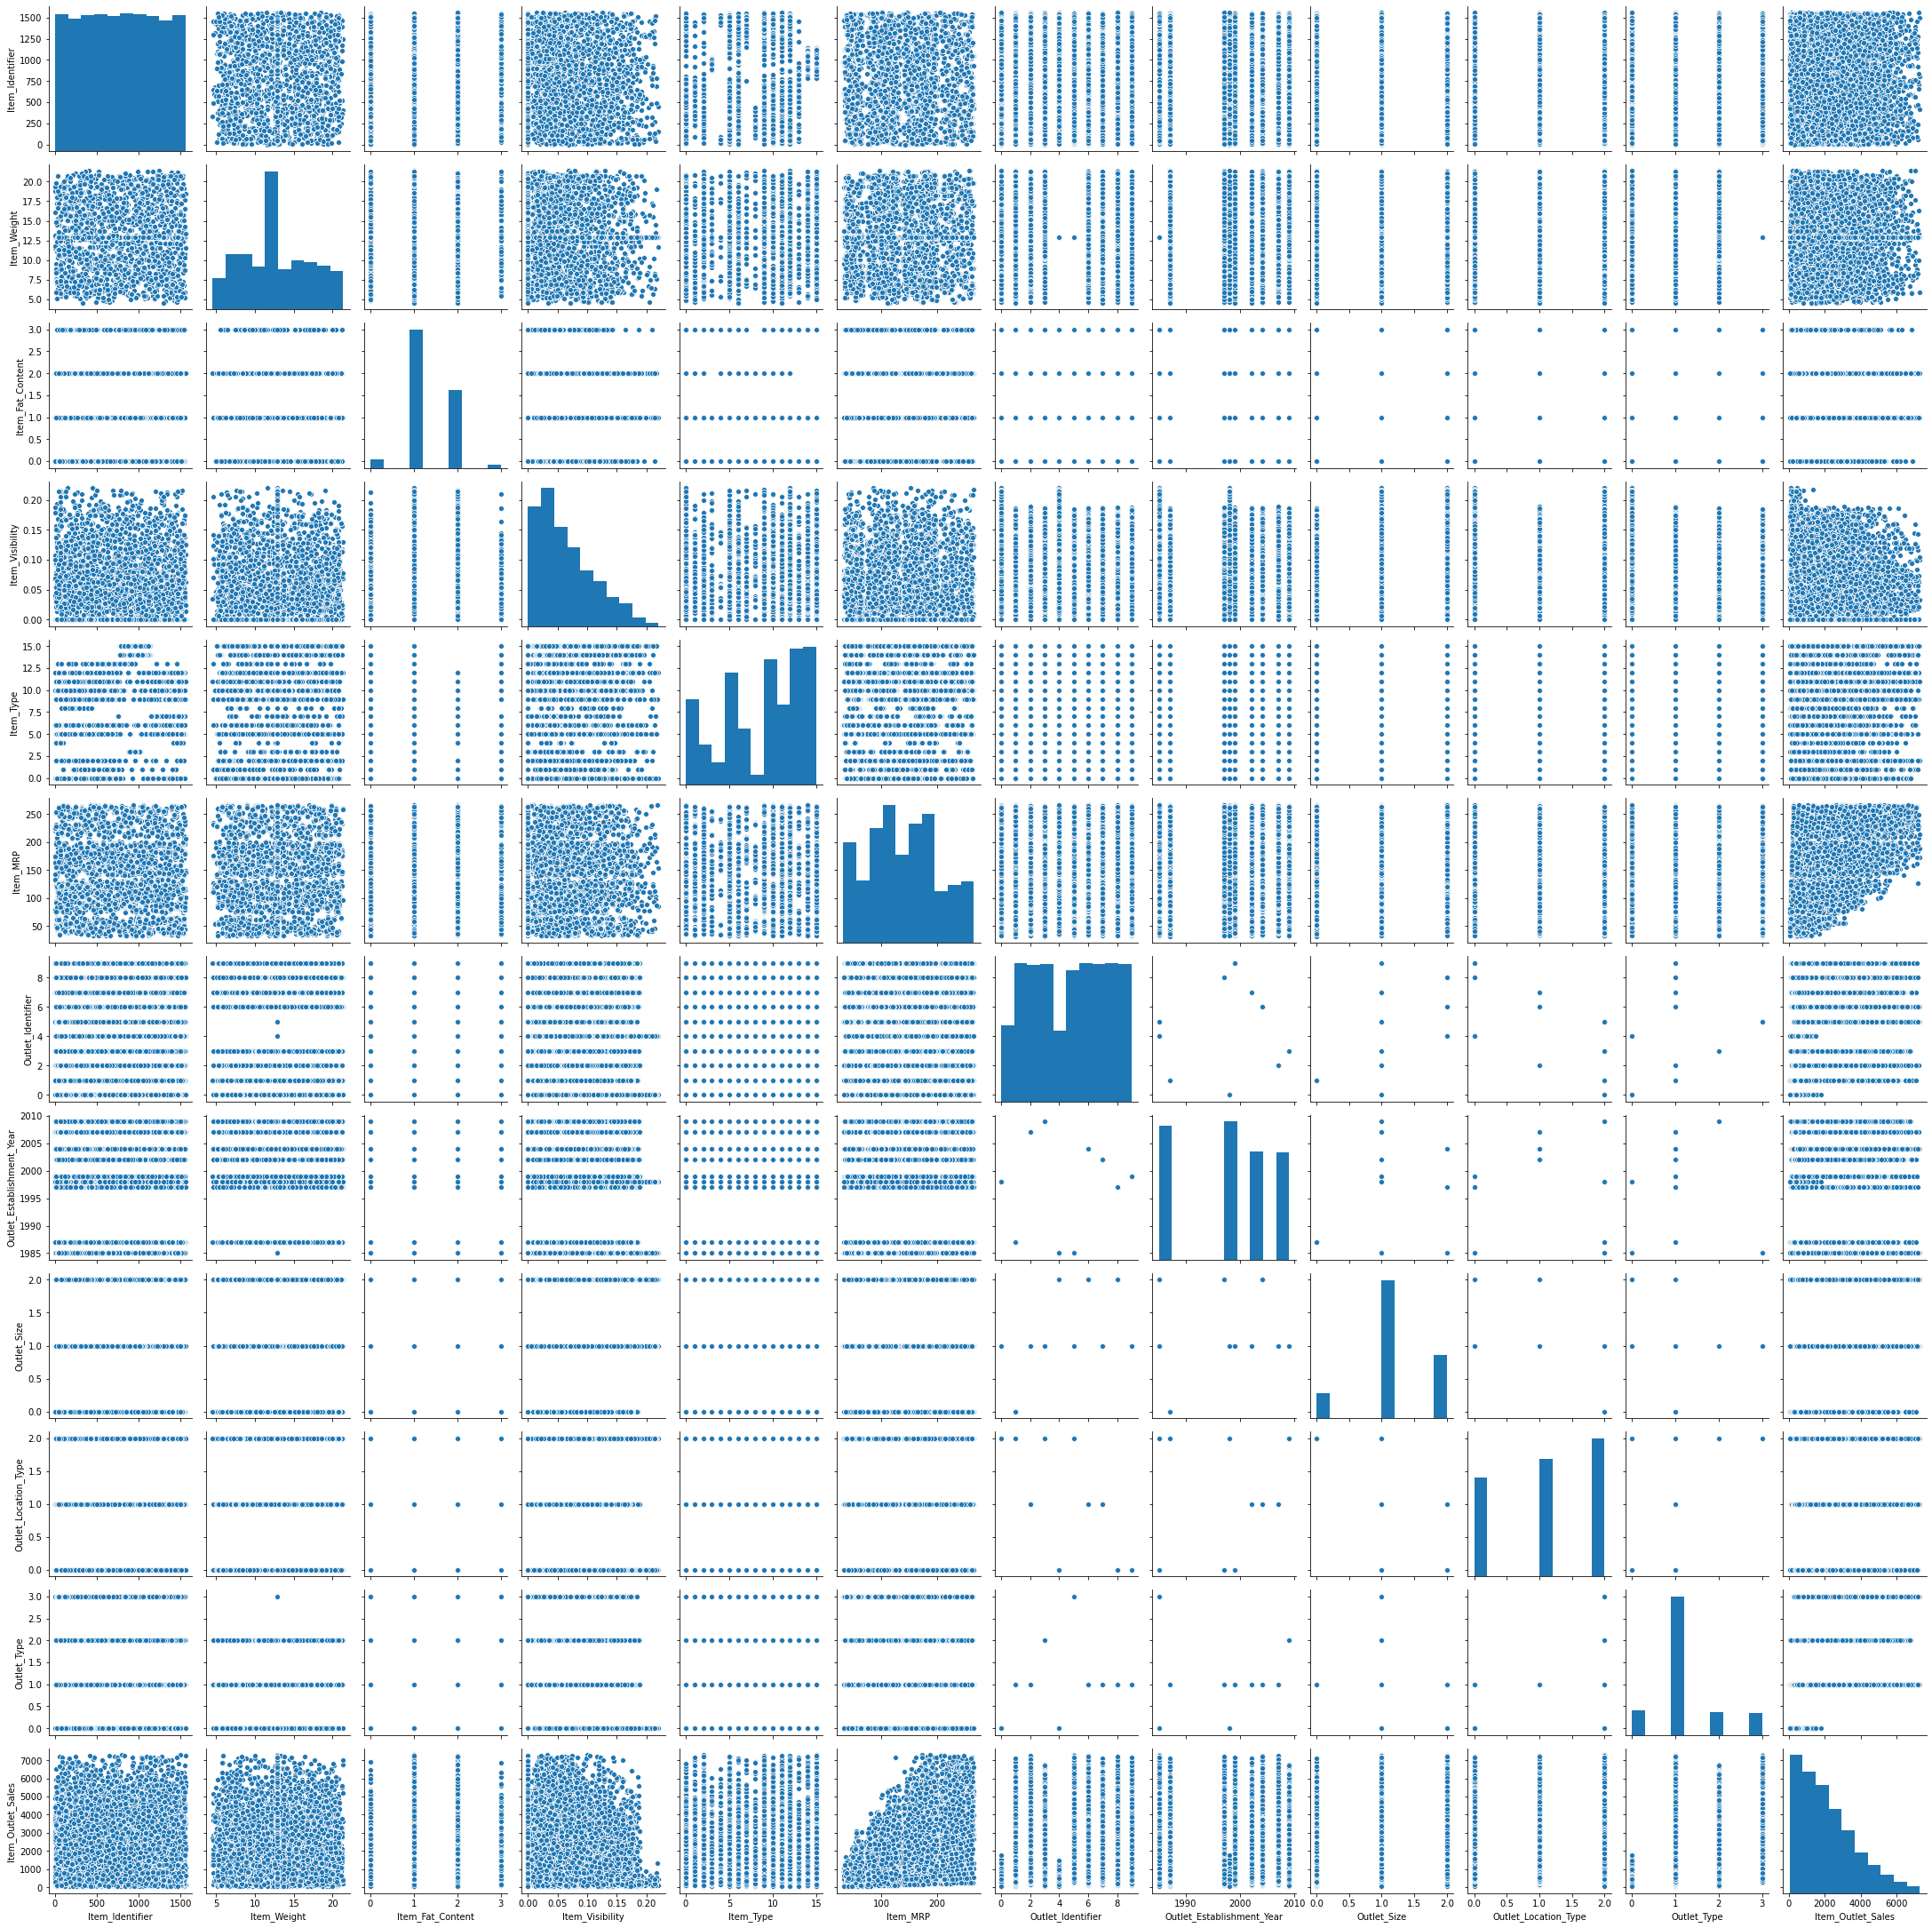

In [60]:
sns.pairplot(dm_new)

In [73]:
dm

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1142,9.300,1,0.016047,10,249.8092,9,1999,1,0,1,3735.1380
1,377,5.920,2,0.019278,6,48.2692,3,2009,1,2,2,443.4228
2,208,17.500,1,0.016760,2,141.6180,9,1999,1,0,1,2097.2700
3,424,19.200,2,0.000000,12,182.0950,0,1998,1,2,0,732.3800
4,819,8.930,1,0.000000,15,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1406,6.865,1,0.056783,5,214.5218,1,1987,0,2,1,2778.3834
8519,497,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,892,10.600,1,0.035186,14,85.1224,6,2004,2,1,1,1193.1136
8521,232,7.210,2,0.145221,5,103.1332,3,2009,1,2,2,1845.5976


In [70]:
dm_new.skew()
import warnings
warnings.filterwarnings('ignore')

In [71]:
import numpy as np
for col in dm_new.columns:
    if dm_new.skew().loc[col]>0.55:
        dm_new[col]=np.log1p(dm_new[col])

In [72]:
dm_new.skew()

Item_Identifier              0.001847
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.636590
Item_Type                   -0.383168
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                 -0.236229
Item_Outlet_Sales           -0.936422
dtype: float64

In [80]:
x=dm_new.iloc[:,0:11]

In [81]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1142,9.300,1,0.015795,10,249.8092,9,1999,1,0,0.693147
1,377,5.920,2,0.018915,6,48.2692,3,2009,1,2,1.098612
2,208,17.500,1,0.016485,2,141.6180,9,1999,1,0,0.693147
3,424,19.200,2,0.000000,12,182.0950,0,1998,1,2,0.000000
4,819,8.930,1,0.000000,15,53.8614,1,1987,0,2,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
8518,1406,6.865,1,0.053759,5,214.5218,1,1987,0,2,0.693147
8519,497,8.380,2,0.044889,0,108.1570,7,2002,1,1,0.693147
8520,892,10.600,1,0.033997,14,85.1224,6,2004,2,1,0.693147
8521,232,7.210,2,0.127159,5,103.1332,3,2009,1,2,1.098612


In [82]:
x.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [85]:
y=dm_new.iloc[:,-1]

In [86]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [88]:
y=pd.DataFrame(data=y)

In [89]:
y.columns

Index(['Item_Outlet_Sales'], dtype='object')

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [91]:
lm=LinearRegression()

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.22)

In [93]:
lm.fit(x_train,y_train)

LinearRegression()

In [94]:
lm.score(x_train,y_train)

0.6233466697390773

In [95]:
pred=lm.predict(x_test)
pred

array([[6.71909711],
       [9.04687139],
       [8.47665513],
       ...,
       [7.08597315],
       [6.96093363],
       [8.66291662]])

In [96]:
print(r2_score(y_test,pred))

0.6380533396042158


In [97]:
print('error:')
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:', mean_squared_error(y_test,pred))

print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.4706706479751377
mean squared error: 0.3562466971576712
root mean squared error: 0.5968640524924174


In [98]:
import joblib
joblib.dump(lm,'lm_world happiness_score.obj')

['lm_world happiness_score.obj']

In [101]:
from sklearn.model_selection import cross_val_score

lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.6289066  0.63083305 0.608193   0.61600978 0.64172635]
0.6251337561193026 0.011766621770300382


In [102]:
import joblib
joblib.dump(lm,'lm_world happiness_score.obj')

['lm_world happiness_score.obj']

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

lr=LinearRegression()
lr.fit(x,y)
print(lr.coef_)

rd=Ridge(alpha=.001)
rd.fit(x,y)
print(rd.coef_)

[[ 2.29850247e-05 -8.49265944e-04  1.82671636e-02 -7.33911052e-01
  -2.56805445e-03  8.21762815e-03  1.84047235e-02  8.36754515e-03
  -2.99822047e-01 -3.08495847e-01  1.70124814e+00]]
[[ 2.29851602e-05 -8.49261045e-04  1.82670337e-02 -7.33858164e-01
  -2.56804958e-03  8.21762783e-03  1.84052772e-02  8.36756565e-03
  -2.99822299e-01 -3.08493869e-01  1.70124478e+00]]


In [108]:
import joblib
joblib.dump(lm,'lm_world happiness_score.obj')

['lm_world happiness_score.obj']